# Az Handwritten Character Recognition using CNN

In [9]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from matplotlib.patches import Rectangle

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Set style
plt.style.use('ggplot')

# Step 2: Load dataset

In [10]:
print("Loading dataset...")
data = pd.read_csv('data/A_Z Handwritten Data.csv')
data.columns = ['label'] + [f'pixel{i}' for i in range(784)]

Loading dataset...


# Step 3: Shuffle and split into training/testing

In [11]:
print("Shuffling and splitting dataset...")
data = data.sample(frac=1).reset_index(drop=True)
train = data.iloc[:250000, :]
test = data.iloc[250000:350000, :].reset_index(drop=True)

Shuffling and splitting dataset...


# Step 4: Visualize class distribution

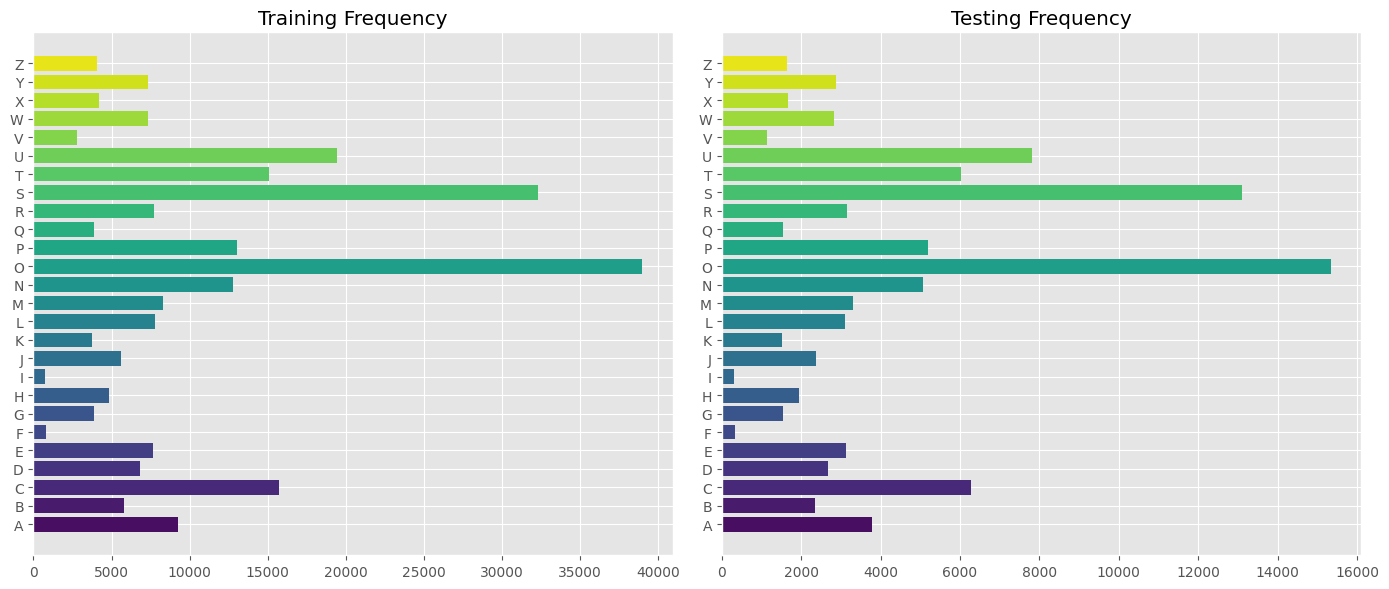

In [12]:
letters = [chr(i) for i in range(65, 91)]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.barh(letters, train['label'].value_counts().sort_index(), color=sns.color_palette('viridis', 26))
ax1.set_title('Training Frequency')
ax2.barh(letters, test['label'].value_counts().sort_index(), color=sns.color_palette('viridis', 26))
ax2.set_title('Testing Frequency')
plt.tight_layout()
plt.show()

# Step 5: Prepare features and labels

In [13]:
train_x = train.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
train_y = to_categorical(train['label'], 26)
test_x = test.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
test_y = test['label']

# Step 6: Visualize some samples

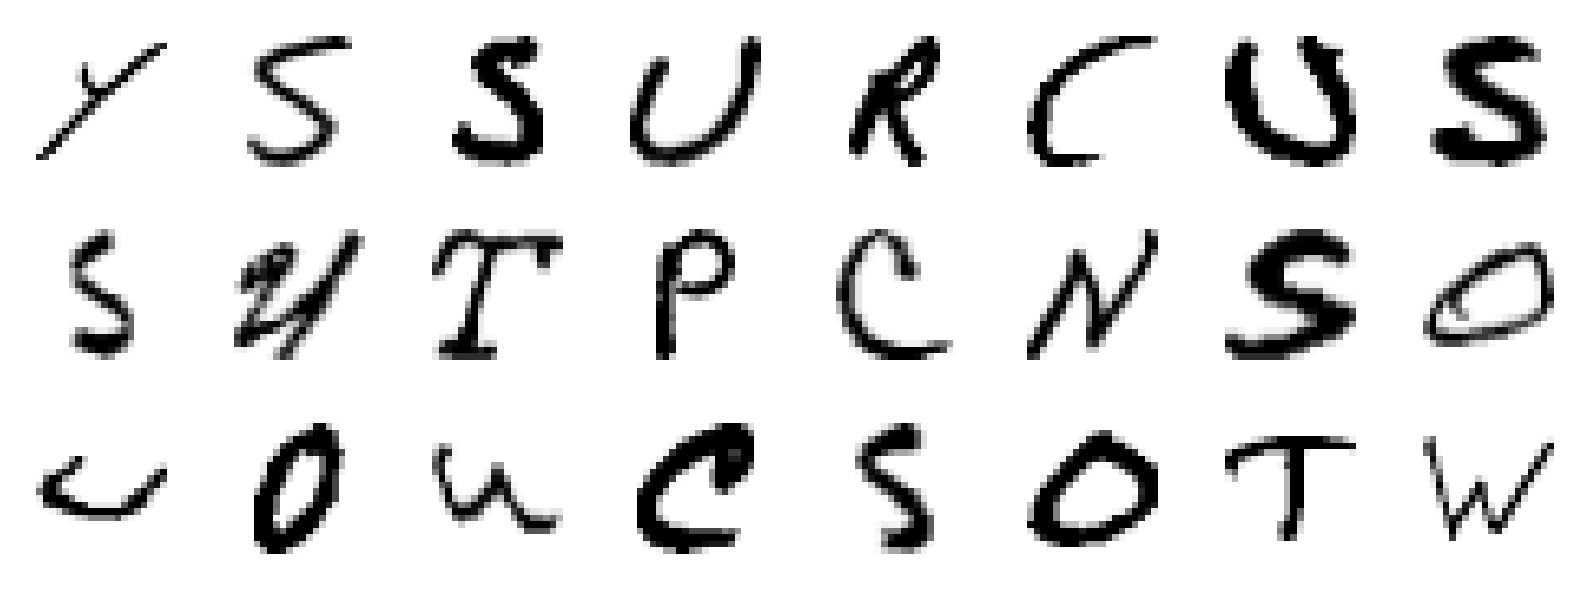

In [14]:
random_indices = np.random.choice(len(train), 24, replace=False)
fig, axes = plt.subplots(3, 8, figsize=(16, 6))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(train[train.columns[1:]].iloc[random_indices[i]].values.reshape(28, 28), cmap='Greys')
    ax.axis('off')
plt.tight_layout()
plt.show()

# Step 7: Build the CNN model

In [15]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(26, activation='softmax')
])
model.summary()

/Users/akinsholaakinade/Desktop/az-handwritten-cnn-fresh/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 6, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        73,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │         6,682 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193,018 (753.98 KB)

 Trainable params: 193,018 (753.98 KB)

 Non-trainable params: 0 (0.00 B)

# Step 8: Compile and train the model

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
history = model.fit(train_x, train_y, validation_split=0.2, epochs=10, batch_size=50, callbacks=[early_stopping])

Epoch 1/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 86s 21ms/step - accuracy: 0.8929 - loss: 0.3704 - val_accuracy: 0.9821 - val_loss: 0.0640
Epoch 2/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 97s 24ms/step - accuracy: 0.9813 - loss: 0.0631 - val_accuracy: 0.9843 - val_loss: 0.0558
Epoch 3/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 97s 24ms/step - accuracy: 0.9862 - loss: 0.0480 - val_accuracy: 0.9860 - val_loss: 0.0507
Epoch 4/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 91s 23ms/step - accuracy: 0.9887 - loss: 0.0390 - val_accuracy: 0.9879 - val_loss: 0.0450
Epoch 5/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 89s 22ms/step - accuracy: 0.9901 - loss: 0.0329 - val_accuracy: 0.9873 - val_loss: 0.0451
Epoch 6/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 96s 24ms/step - accuracy: 0.9914 - loss: 0.0287 - val_accuracy: 0.9843 - val_loss: 0.0575
Epoch 7/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 95s 24ms/step - accuracy: 0.9918 - loss: 0.0273 - val_accuracy: 0.9884 - val_loss: 0.0417
Epoch 8/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 97s 24ms/step - accuracy: 0.9926 -

# Step 9: Plot training history

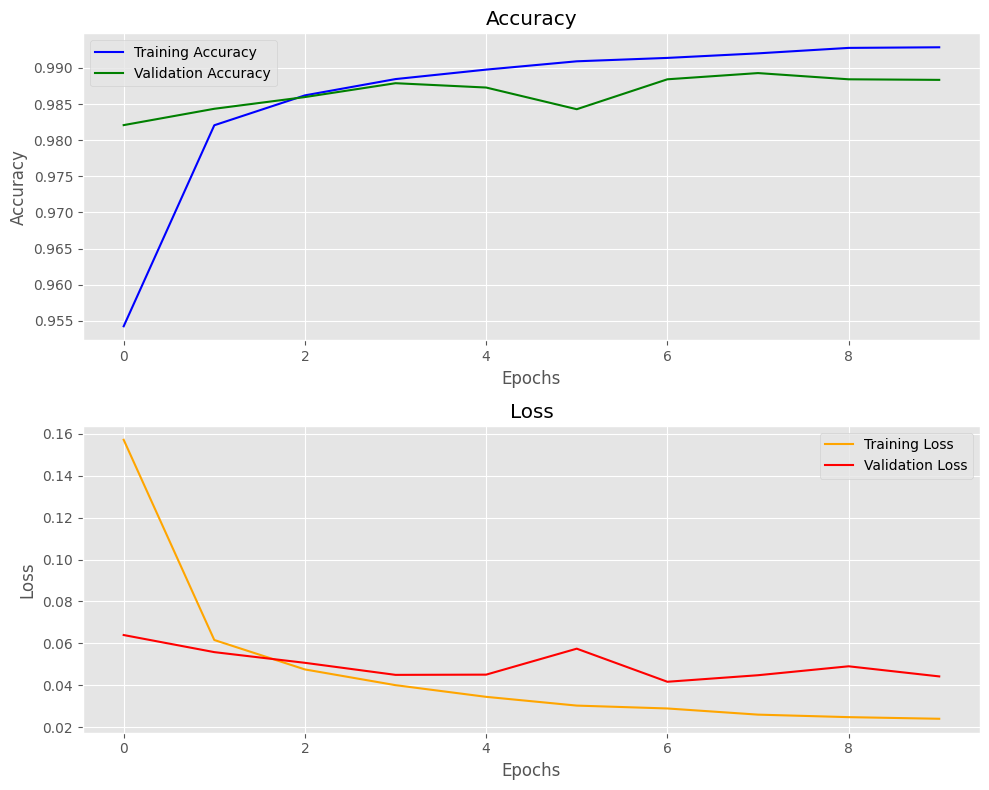

In [17]:
history_df = pd.DataFrame(history.history)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
ax1.plot(history_df['accuracy'], label='Training Accuracy', color='blue')
ax1.plot(history_df['val_accuracy'], label='Validation Accuracy', color='green')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(history_df['loss'], label='Training Loss', color='orange')
ax2.plot(history_df['val_loss'], label='Validation Loss', color='red')
ax2.set_title('Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()

# Step 10: Evaluate on test set

In [18]:
test_y_cat = to_categorical(test_y, 26)
test_loss, test_accuracy = model.evaluate(test_x, test_y_cat, verbose=0)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 98.94%


# Step 11: Predict on test set

In [19]:
preds = model.predict(test_x)
pred_labels = np.argmax(preds, axis=1)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step


# Step 12: Classification report and per-class accuracy

In [20]:
print("\nClassification Report:")
print(classification_report(test_y, pred_labels, target_names=letters))

class_accuracies = {}
for i in range(26):
    correct = np.sum((test_y == i) & (pred_labels == i))
    total = np.sum(test_y == i)
    acc = correct / total if total > 0 else 0
    class_accuracies[letters[i]] = acc

print("\nPer-Class Accuracy:")
for label, acc in class_accuracies.items():
    print(f"{label}: {acc * 100:.2f}%")


Classification Report:
              precision    recall  f1-score   support

           A       1.00      0.99      0.99      3775
           B       0.99      0.99      0.99      2357
           C       0.99      0.98      0.99      6277
           D       0.96      0.96      0.96      2664
           E       0.99      0.99      0.99      3128
           F       0.97      0.99      0.98       324
           G       0.99      0.98      0.98      1546
           H       0.99      0.97      0.98      1951
           I       0.99      0.98      0.98       311
           J       0.99      0.98      0.98      2366
           K       0.98      0.98      0.98      1524
           L       0.99      0.98      0.98      3101
           M       0.99      0.99      0.99      3306
           N       0.99      0.99      0.99      5079
           O       0.99      0.99      0.99     15332
           P       1.00      0.99      0.99      5188
           Q       0.98      0.99      0.98      1539
   

# Step 13: Visualize a random prediction

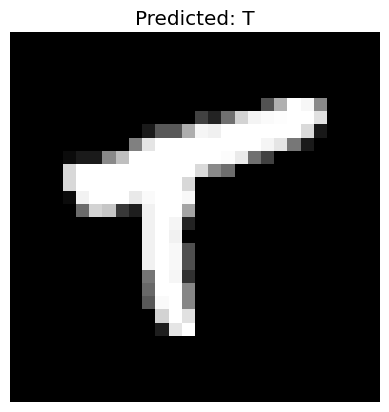

In [21]:
index = np.random.randint(len(test))
pixels = test.iloc[index, 1:].values.reshape(28, 28)
plt.imshow(pixels, cmap='Greys_r')
plt.axis('off')
plt.title(f"Predicted: {chr(pred_labels[index] + 65)}")
plt.show()

# Step 14: Count correct and incorrect predictions

In [22]:
wrong_preds = np.where(pred_labels != test_y)[0]
right_preds = np.where(pred_labels == test_y)[0]
print(f"\nCorrect predictions: {len(right_preds)} / {len(test_y)}")
print(f"Incorrect predictions: {len(wrong_preds)}")


Correct predictions: 98937 / 100000
Incorrect predictions: 1063


# Step 15: Visualize correct predictions

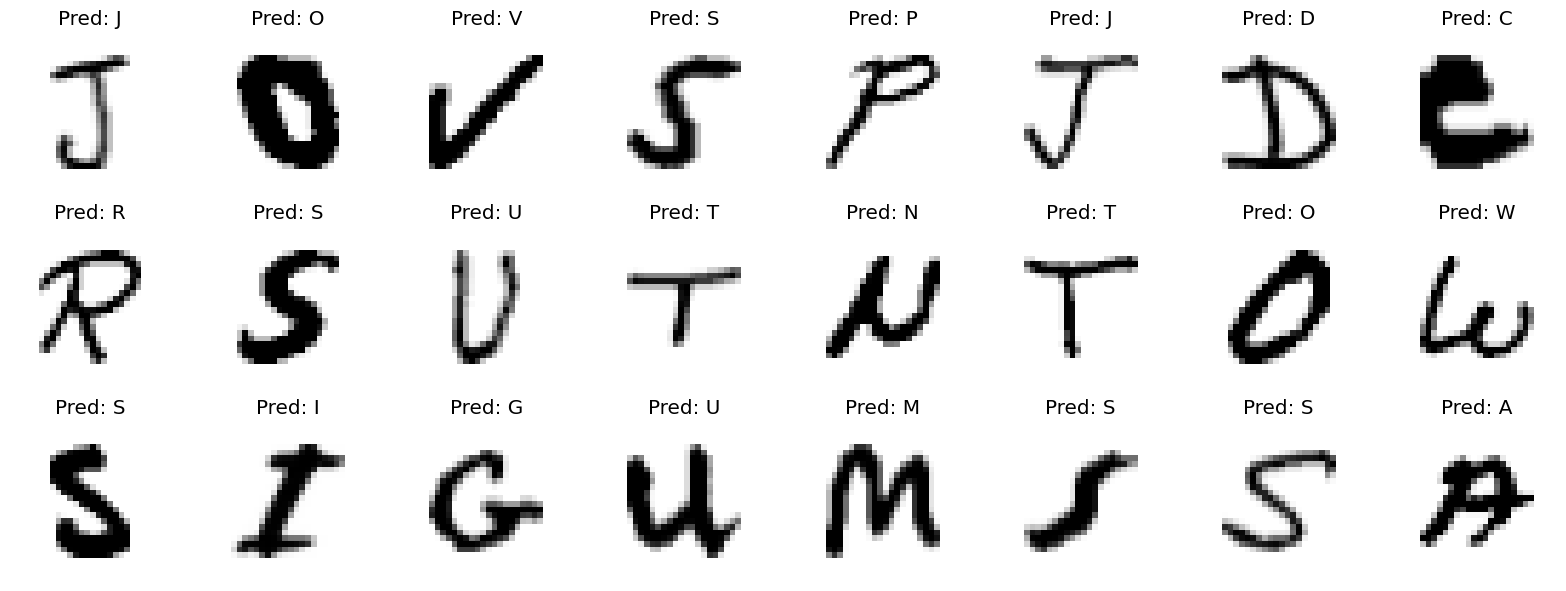

In [23]:
np.random.shuffle(right_preds)
fig, axes = plt.subplots(3, 8, figsize=(16, 6))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(test.iloc[right_preds[i], 1:].values.reshape(28, 28), cmap='Greys')
    ax.axis('off')
    ax.set_title(f"Pred: {chr(pred_labels[right_preds[i]] + 65)}")
plt.tight_layout()
plt.show()

# Step 16: Plot confusion matrix

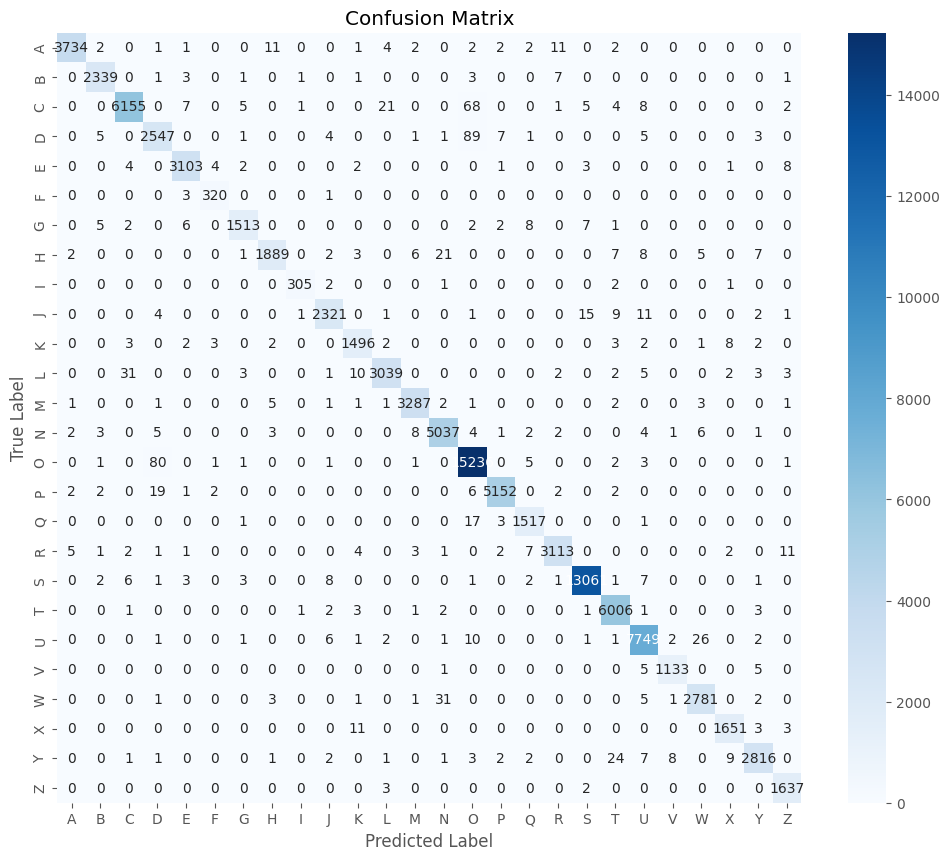

In [24]:
conf_mat = confusion_matrix(test_y, pred_labels)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=letters, yticklabels=letters)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()